# Big Project: Fantasy Premier League (FPL) Points Predictor
## Data Rules Everything Around Me (DREAM) TEAM - Fall 2024 - CME 538
## Feras Abdulla - Maha Fakhroo - Syed Shahid Hossaini - Eric Guan
-----------------------------------------------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis (EDA) and Visualizations
-----------------------------------------------------------------------------------------------------------------------------------------------

### Import Packages
Imports essential Python libraries and machine learning tools for data analysis, visualization, and model evaluation, as well as functions for splitting data into training and testing sets. These are typically used in machine learning projects to build and assess predictive models.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import ast

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import Data
Let's start by importing the training and testing data.

In [15]:
train = pd.read_csv('train.csv')
train.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,0,0,0,55,True,0,1,0.392763,0.000000,0.392763
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,0,0,0,50,True,0,1,0.000000,0.000000,0.000000
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,...,0,0,0,50,True,0,1,NaN,NaN,NaN
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,0,0,0,50,True,0,1,0.000000,0.000000,0.000000
4,Abdoulaye DoucourA©,MID,Everton,1.3,0,0,20,1,44.6,512,...,0,0,0,55,False,0,1,0.000000,0.205708,0.205708


In [16]:
train.shape

(106042, 39)

In [17]:
test = pd.read_csv('test.csv')
test.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,...,1,0.0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,...,1,0.0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,...,2,0.0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,...,2,0.0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,...,1,16.0,1,0,0,0,55,False,1,1


In [18]:
test.shape

(5878, 39)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106042 entries, 0 to 106041
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   name                               106042 non-null  object 
 1   position                           106042 non-null  object 
 2   team                               106042 non-null  object 
 3   xP                                 106042 non-null  float64
 4   assists                            106042 non-null  int64  
 5   bonus                              106042 non-null  int64  
 6   bps                                106042 non-null  int64  
 7   clean_sheets                       106042 non-null  int64  
 8   creativity                         106042 non-null  float64
 9   element                            106042 non-null  int64  
 10  fixture                            106042 non-null  int64  
 11  goals_conceded                     1060

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               5878 non-null   object 
 1   position                           5878 non-null   object 
 2   team                               5878 non-null   object 
 3   xP                                 5878 non-null   float64
 4   assists                            5878 non-null   int64  
 5   bonus                              5878 non-null   int64  
 6   bps                                5878 non-null   int64  
 7   clean_sheets                       5878 non-null   int64  
 8   creativity                         5878 non-null   float64
 9   element                            5878 non-null   int64  
 10  expected_assists                   5878 non-null   float64
 11  expected_goal_involvements         5878 non-null   float

Now, let's explore how many missing values exist in the train dataframe:

In [21]:
# Determine missing values for each column
missing_values = train.isnull().sum()

# Create a df of missing values
missing_df = pd.DataFrame({'Missing Values': missing_values})

missing_df

,Missing Values
name,0
position,0
team,0
xP,0
assists,0
bonus,0
bps,0
clean_sheets,0
creativity,0
element,0


So, we see that our efforts to impute/drop missing values will have to focus on three main features: `'expected_goals'`, `'expected_assists'`, and `'expected_goal_involvements'`. Let's go ahead and drop the NaN values, because our large data set will remain substantial to explore and train an ML model even after dropping the missing values.

In [22]:
train = train.dropna()
train.shape

(73394, 39)

Let's also examine the columns that contain categorical data, including how many unique values each contains and what those unique values are. 

In [23]:
# Define categorical columns
categorical_columns = ['position', 'team']

# Calculate how many unique values there are for each categorical column
unique_vals = train[categorical_columns].nunique()
print("Unique values in categorical features:")
print(unique_vals)

# Print different categorical values
for i in categorical_columns:
    print(f"\nUnique values in '{i}':")
    print(train[i].unique())

Unique values in categorical features:
position     5
team        26
dtype: int64

Unique values in 'position':
['FWD' 'DEF' 'GK' 'MID' 'GKP']

Unique values in 'team':
['Brighton' 'West Ham' 'Sheffield Utd' 'Everton' 'Fulham' 'Wolves'
 'Arsenal' 'Southampton' 'Newcastle' 'Chelsea' 'Liverpool'
 'Crystal Palace' 'Leicester' 'Spurs' 'West Brom' 'Leeds' 'Man Utd'
 'Burnley' 'Man City' 'Aston Villa' 'Watford' 'Norwich' 'Brentford'
 'Bournemouth' "Nott'm Forest" 'Luton']


As we can see, there are 5 unique player positions: `'FWD'` = Forward, `'DEF'` = Defender, `'MID'` = Midfielder, and `'GK/GKP'` = Goalkeeper. Both GK and GKP refer to the same position but are written differently due to different syntax formats across different seasons, so we will have to align them into one value: `'GK'`. We will also change the abbreviated name of Nottingham Forest in the team column, `'Nott'm Forest'`, to the full name: `'Nottingham Forest'`.

In [24]:
train['position'] = train['position'].replace('GKP', 'GK') # GKP --> GK
train['team'] = train['team'].replace("Nott'm Forest", "Nottingham Forest") # Nott'm Forest --> Nottingham Forest

# Calculate how many unique values there are for each categorical column
unique_vals = train[categorical_columns].nunique()
print("Unique values in categorical features:")
print(unique_vals)

# Print different categorical values
for i in categorical_columns:
    print(f"\nUnique values in '{i}':")
    print(train[i].unique())

Unique values in categorical features:
position     4
team        26
dtype: int64

Unique values in 'position':
['FWD' 'DEF' 'GK' 'MID']

Unique values in 'team':
['Brighton' 'West Ham' 'Sheffield Utd' 'Everton' 'Fulham' 'Wolves'
 'Arsenal' 'Southampton' 'Newcastle' 'Chelsea' 'Liverpool'
 'Crystal Palace' 'Leicester' 'Spurs' 'West Brom' 'Leeds' 'Man Utd'
 'Burnley' 'Man City' 'Aston Villa' 'Watford' 'Norwich' 'Brentford'
 'Bournemouth' 'Nottingham Forest' 'Luton']


Let's also examine the data for the presence of duplicate rows.

In [25]:
print(f"Number of duplicate rows in the train data set: {train.duplicated().sum()}")
print(f"Number of duplicate rows in the test data set: {test.duplicated().sum()}")

Number of duplicate rows in the train data set: 0
Number of duplicate rows in the test data set: 0


Nice, no duplicates!

In [ ]:
# Clean accents from 'First Name' and 'Second Name' in elements_df
def remove_accents(text):
    nfkd_form = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply accent removal
elements_df['first_name'] = elements_df['first_name'].apply(remove_accents)
elements_df['second_name'] = elements_df['second_name'].apply(remove_accents)

## Defining Functions for Data Processing

We want to define methods to clean and process the data. `NOTE:` these functions will be called in the feature engineering pipeline, to ensure consistency in how the training and testing data is prepared.

First, we will prepare a function to convert the `'Date/Time'` column into datetime format:

In [12]:
def convert_to_datetime(data):
    # First, convert Date/Time to a datetime UTC format
    data['Date/Time'] = pd.to_datetime(data['unix_time'], unit='s')
    return data

Below, we will define a function to convert the units across the dataframe into a consistent set. Miles will be converted to km, mph to kph, and Fahrenheit to Celsius. 

In [13]:
def convert_units(data):

    # Convert Units
    # Extract units once
    units_df = data['units'].apply(ast.literal_eval).apply(pd.Series)
    units_df.columns = ['Temperature Unit', 'Windspeed Unit', 'Average Trip Distance Unit',
                        'Weekly High Temperature Unit', 'Weekly Low Temperature Unit', 'Date/Time Unit']
    data = pd.concat([data, units_df], axis=1)
    # Unit Conversions
    data['Temperature'] = np.where(data['Temperature Unit'] == 'F', (data['Temperature']-32)*5/9, data['Temperature'])
    data['Weekly High Temperature'] = np.where(data['Weekly High Temperature Unit'] == 'F', (data['Weekly High Temperature']-32)*5/9, 
                                               data['Weekly High Temperature'])
    data['Weekly Low Temperature'] = np.where(data['Weekly Low Temperature Unit'] == 'F', (data['Weekly Low Temperature']-32)*5/9, 
                                               data['Weekly Low Temperature'])
    data['Windspeed'] = np.where(data['Windspeed Unit'] == 'mph', data['Windspeed']*1.6, data['Windspeed'])
    data['Average Trip Distance'] = np.where(data['Average Trip Distance Unit'] == 'mi', data['Average Trip Distance']*1.6, 
                                            data['Average Trip Distance'])
    return data

Next, we will write a function to deal with both missing and extreme positive and negative values. First, we will replace all extreme values in `'Windspeed'`, `'Humidity'`, and `'Temperature'` with NaNs. Then, we will impute all the NaNs in those three columns (both values that were originally NaN and exteme values that have been changed to NaN) with the median of the remaining valid figures in each of the 3 columns.

In [14]:
def impute_extremes_nan(data):
    # Define conditions for extreme values
    extreme_conditions = {'Windspeed': (data['Windspeed'] < 0) | (data['Windspeed'] > 200), # 0 windspeed to 200 kph (hurricane speeds)
        'Humidity': (data['Humidity'] < 0) | (data['Humidity'] > 100), # 0% to 100% humidity
        'Temperature': (data['Temperature'] < -50) | (data['Temperature'] > 50)} # Remove extreme cold and hot weather conditions
    # Replace extreme values with NaN
    for col, condition in extreme_conditions.items():
        data.loc[condition, col] = np.nan
    # Impute ALL NaN values with the median of the remaining valid values
    for col in extreme_conditions.keys():
        data[col] = data[col].fillna(data[col].median())
    return data

Now, we will create a method to label encode the `'Weather'` column. The original `'Weather'` column will be retained, a new label-encoded `'Weather_encoded'` column will be created.

In [15]:
def encode_weather(data):

    # Label encode the weather column
    le = LabelEncoder()
    label = le.fit_transform(data['Weather'])
    data['Weather_encoded'] = label
    return data

We will also define a function to extract some time elements from the `'Date/Time'` column. These elements will be stored in newly created columns, `'Hour'`, `'DayOfWeek'` (from Monday = 0 to Sunday = 6), and `'Weekend'` (weekend = 1 and weekday = 0).

In [16]:
def time_elements(data):
    # Extract hour, day of the week (0 Monday to 6 Sunday), and weekend as a binary (1 if weekend, 0 otherwise)
    data['Hour'] = data['Date/Time'].dt.hour # Extract hour
    data['DayOfWeek'] = data['Date/Time'].dt.dayofweek # Extract day of week (Monday = 0 to Sunday = 6)
    data['Weekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0) # Determine if weekend (1 if yes, 0 if no)
    data['WeekOfYear'] = data['Date/Time'].dt.isocalendar().week # Extract week of year
    data['Month'] = data['Date/Time'].dt.month # Extract month
    return data

## Exploratory Data Analysis

The first thing we will do is to create a copy of the train dataframe called `'train_vis'`, which we will use to explore the data and create visualizations.

In [17]:
train_vis = train.copy() # Create a copy

Now that we have created a copy of `'train'`, we can rest assured that the underlying data will not be distorted/changed. It is important to note that we should be conducting EDA and creating visualizations on the filtered/processed data (i.e., the data after the functions defined above have been executed). Therefore, let us run the processing functions on `'train_vis'`.

In [18]:
train_vis = convert_to_datetime(train_vis) # Convert Date/Time to datetime format
train_vis = convert_units(train_vis) # Convert units as prescribed above

Now that we have converted units, and before we impute and fill NaN values, let's explore the prevalence of extreme values in our data set, which can skew the distribution and potentially distort our analysis and the predictive power of our model. This includes corrupt or missing data listed as -999, as an example. Upon preliminary screening, there also seem to exist some unreasonably high values, such as temperatures even above 700 C and humidities above 100%. Upper bounds and imputations for such values were set in the `'impute_extremes_nan()'` function defined above, and are repeated below.

In [19]:
# Define thresholds for extreme values
temperature_low = -50 # Anything below will be considered an error
temperature_high = 50 # Disregard extreme highs
humidity_low = 0 # 0% humidity, no negatives allowed
humidity_high = 100 # 100% humidity, anything above considered an error
windspeed_low = 0 # Nothing less than 0 kph
windspeed_high = 200 # Hurricane speeds, anything over 200 is too much

# Calculate extreme values
extreme_temperature_low = train_vis[train_vis['Temperature'] < temperature_low].shape[0]
extreme_temperature_high = train_vis[train_vis['Temperature'] > temperature_high].shape[0]

extreme_humidity_low = train_vis[train_vis['Humidity'] < humidity_low].shape[0]
extreme_humidity_high = train_vis[train_vis['Humidity'] > humidity_high].shape[0]

extreme_windspeed_low = train_vis[train_vis['Windspeed'] < windspeed_low].shape[0]
extreme_windspeed_high = train_vis[train_vis['Windspeed'] > windspeed_high].shape[0]

# Print results
print(f"Temperature values below {temperature_low}: {extreme_temperature_low}")
print(f"Temperature values above {temperature_high}: {extreme_temperature_high}")

print(f"Humidity values below {humidity_low}: {extreme_humidity_low}")
print(f"Humidity values above {humidity_high}: {extreme_humidity_high}")

print(f"Windspeed values below {windspeed_low}: {extreme_windspeed_low}")
print(f"Windspeed values above {windspeed_high}: {extreme_windspeed_high}")

Temperature values below -50: 569
Temperature values above 50: 197
Humidity values below 0: 571
Humidity values above 100: 205
Windspeed values below 0: 573
Windspeed values above 200: 28


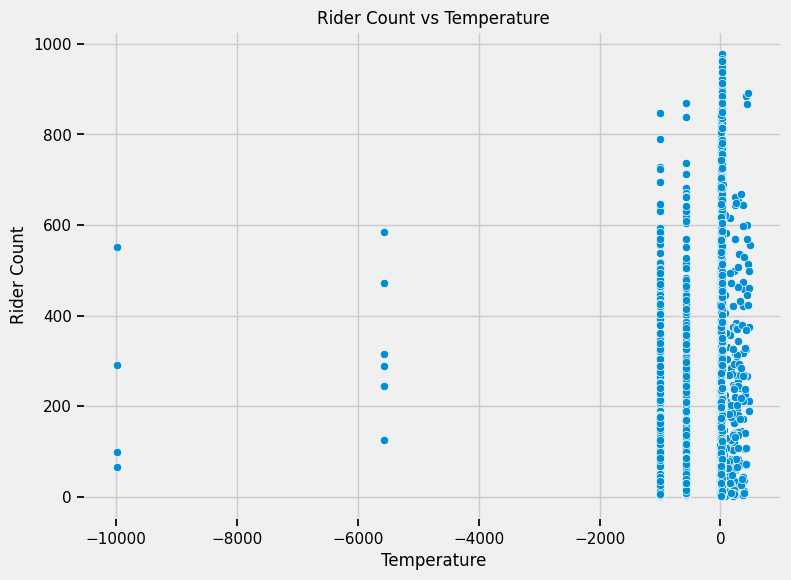

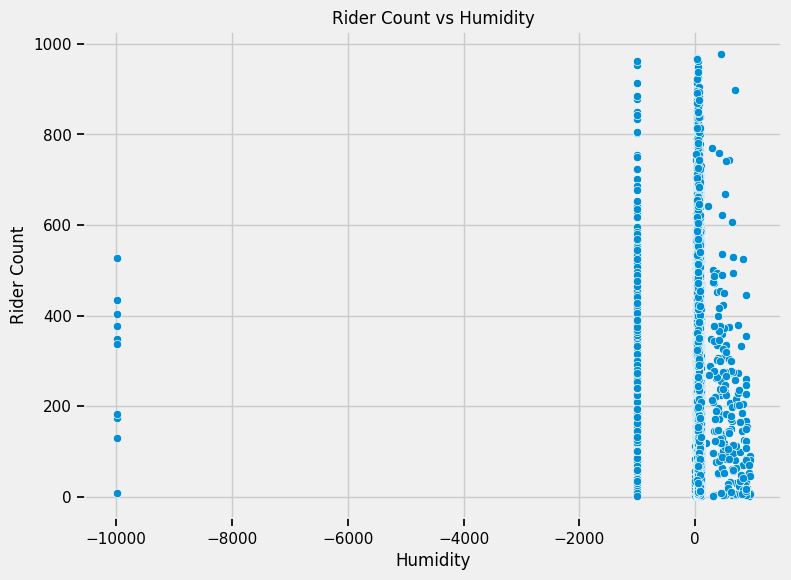

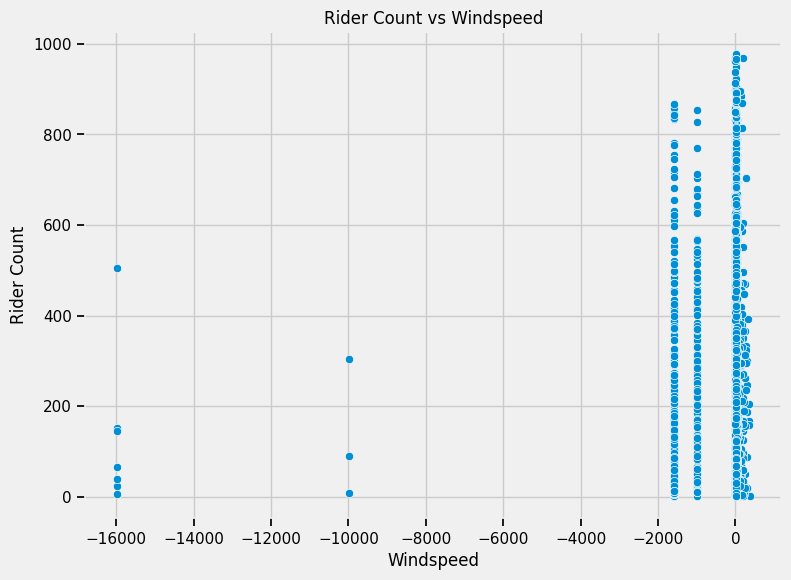

In [20]:
# Scatter Plots for Temperature, Humidity, Windspeed vs Rider Count
features = ['Temperature', 'Humidity', 'Windspeed']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train_vis, x=feature, y='Rider Count')
    plt.title(f"Rider Count vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Rider Count")
    plt.show()

In [21]:
# Print out max values from all three columns
print(train_vis['Temperature'].max())
print(train_vis['Humidity'].max())
print(train_vis['Windspeed'].max())

484.0
940.0
367.85266016


These scatterplots show the presence of some extreme outliers (-999/-9990 for all three, -16000 for `'Windspeed'`!) that could skew our analysis, especially if mean values are taken. While these plots emphasize the negative extremes, there are also positive extremes that are infeasible, such as temperatures of almost 500C and humidities of 940%! To work with sound data, we should remove these extremes. Let's continue by running the remaining functions defined above and seeing the new size of the filtered data set and the first 5 rows:

In [22]:
train_vis = impute_extremes_nan(train_vis) # Impute extreme and NaN values
train_vis = encode_weather(train_vis) # Label encode the weather column
train_vis = time_elements(train_vis) # Extract time elemnents and save them to new columns
print(len(train_vis)) # Examine the length of the filtered data
train_vis.head() # Print the first 5 rows

10750


,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,...,Average Trip Distance Unit,Weekly High Temperature Unit,Weekly Low Temperature Unit,Date/Time Unit,Weather_encoded,Hour,DayOfWeek,Weekend,WeekOfYear,Month
0,5ab8b269fd,1294444800,2011-01-08 00:00:00,Mist and broken clouds,0.5,51.0,11.00000,19.3,-7.1,18,...,mi,F,F,T-5,8,0,5,1,1,1
1,0eb353c11f,1294448400,2011-01-08 01:00:00,Mist,0.5,55.0,6.00000,19.3,-7.1,18,...,km,C,C,T-5,7,1,5,1,1,1
2,1bdf337bd4,1294452000,2011-01-08 02:00:00,Mist,15.5,62.0,0.00000,19.3,-7.1,16,...,mi,F,C,T-5,7,2,5,1,1,1
3,5811602d38,1294455600,2011-01-08 03:00:00,Light Snow,0.5,55.0,11.00000,19.3,-7.1,7,...,mi,F,C,T-5,6,3,5,1,1,1
4,729d82e3b1,1294459200,2011-01-08 04:00:00,Light Rain,0.5,55.0,10.93616,19.3,-7.1,22,...,mi,C,C,T-5,5,4,5,1,1,1


### Visualizations

Next, let's explore the dataset. One thing to investigate what the distribution of our data is over time, given that the data is hourly ride counts.

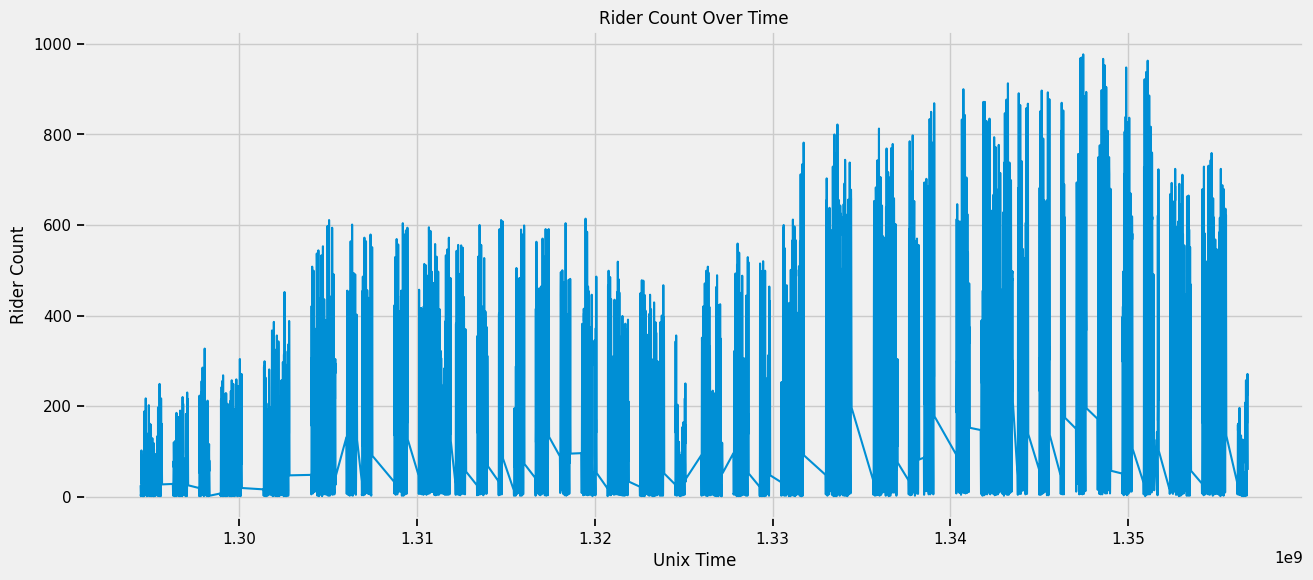

In [23]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=train_vis, x='unix_time', y='Rider Count')
plt.xlabel('Unix Time')
plt.ylabel('Rider Count')
plt.title('Rider Count Over Time')
plt.show()

We can also see the same info but graphed against `'Date/Time'` instead of `'unix_time'`

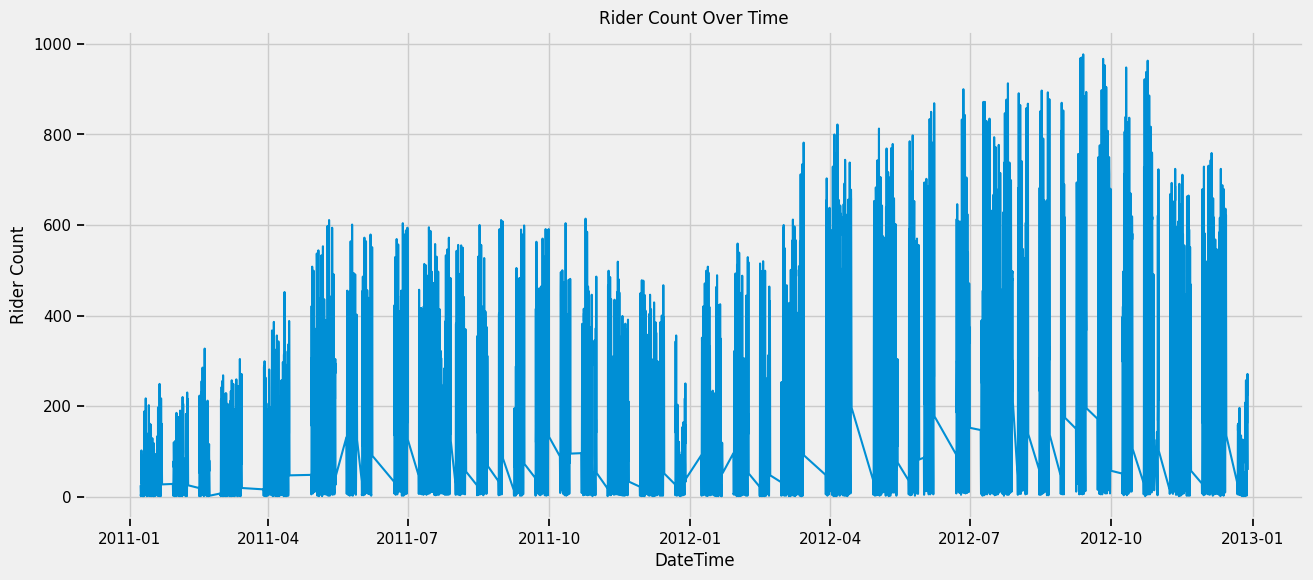

In [24]:
train_vis_sorted = train_vis.sort_values(by='Date/Time')

plt.figure(figsize=(14, 6))
sns.lineplot(data=train_vis_sorted, x='Date/Time', y='Rider Count')
plt.xlabel('DateTime')
plt.ylabel('Rider Count')
plt.title('Rider Count Over Time')
plt.show()

First, let's graph `'Rider Count'` against the categorical features to see the nature and robustness of the relationship between the target label and each categorical feature.

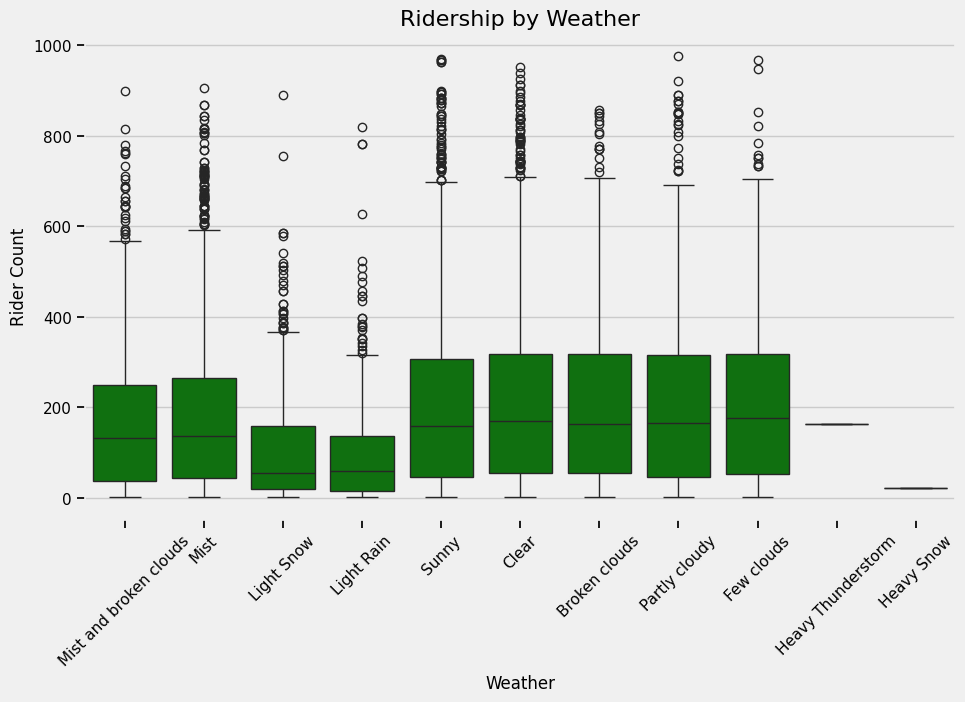

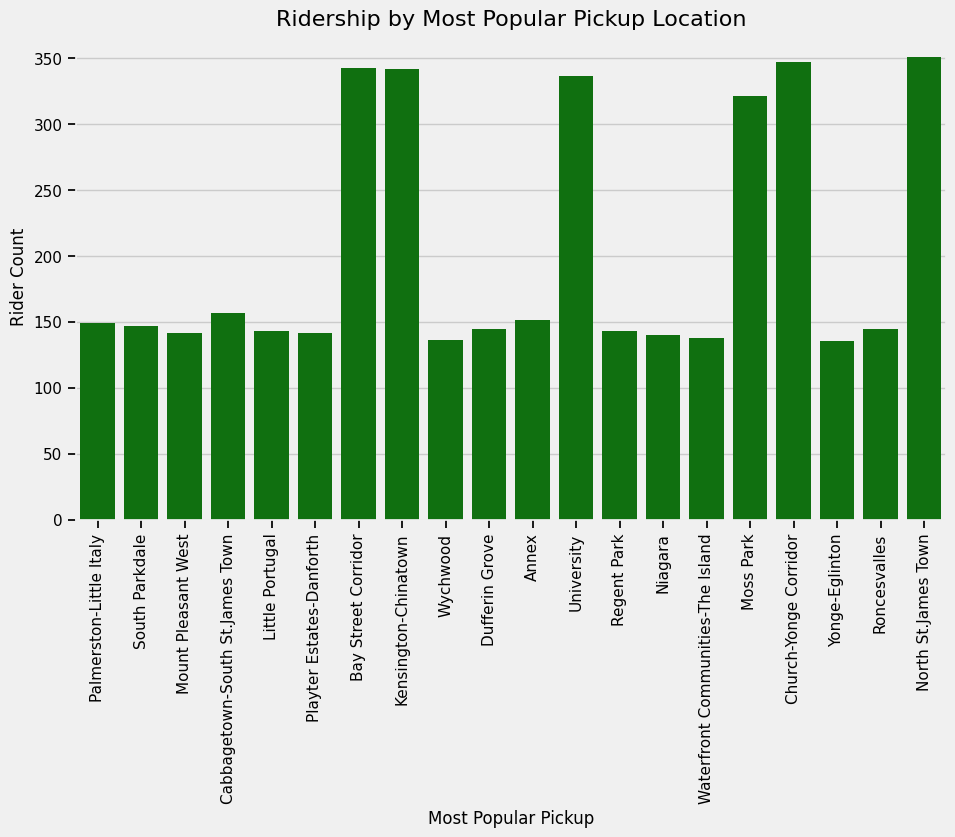

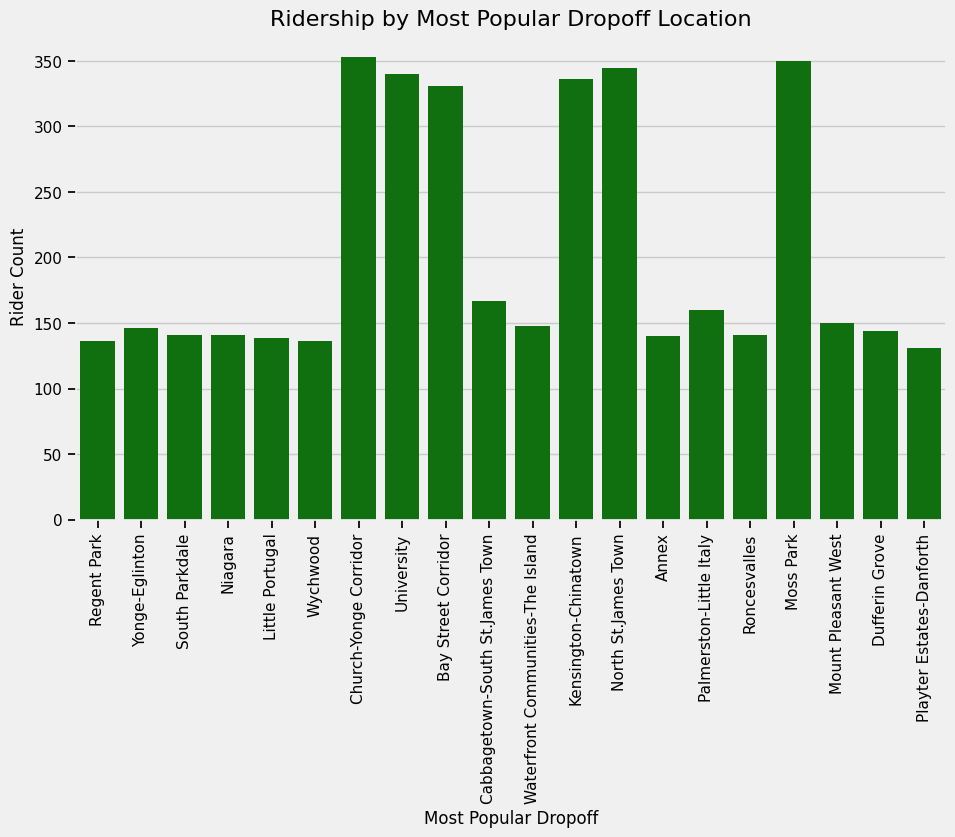

In [25]:
# Plot Rider Count against Weather
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_vis, x='Weather', y='Rider Count', color= 'green')
plt.title('Ridership by Weather', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Rider Count')
plt.show()

# Plot Rider Count against Most Popular Pickup location
plt.figure(figsize=(10, 6))
sns.barplot(data=train_vis, x='Most Popular Pickup', y='Rider Count', estimator='mean', ci=None, color='green')
plt.title('Ridership by Most Popular Pickup Location', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Rider Count')
plt.show()

# Plot Rider Count against Most Popular Dropoff location
plt.figure(figsize=(10, 6))
sns.barplot(data=train_vis, x='Most Popular Dropoff', y='Rider Count', estimator='mean', ci=None, color='green')
plt.title('Ridership by Most Popular Dropoff Location', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Rider Count')
plt.show()

As we can see, precipitation conditions (snow and rain) evince lower median rider counts, as expected. The rest of the weather conditions (cloudy, misty, sunny, clear) exhibit higher, consistent medians and similar distributions. 14 of the 20 pickup/dropoff locations have similar ridership trends, with 6 specific locations presenting higher rider counts than the rest: 'Church-Yonge Corridor', 'University', 'Bay Steet Corridor', 'Kensington-Chinatown', 'North St.James Town', and 'Moss Park'.

We should also see how `'Rider Count'` changes based on different time element bases:

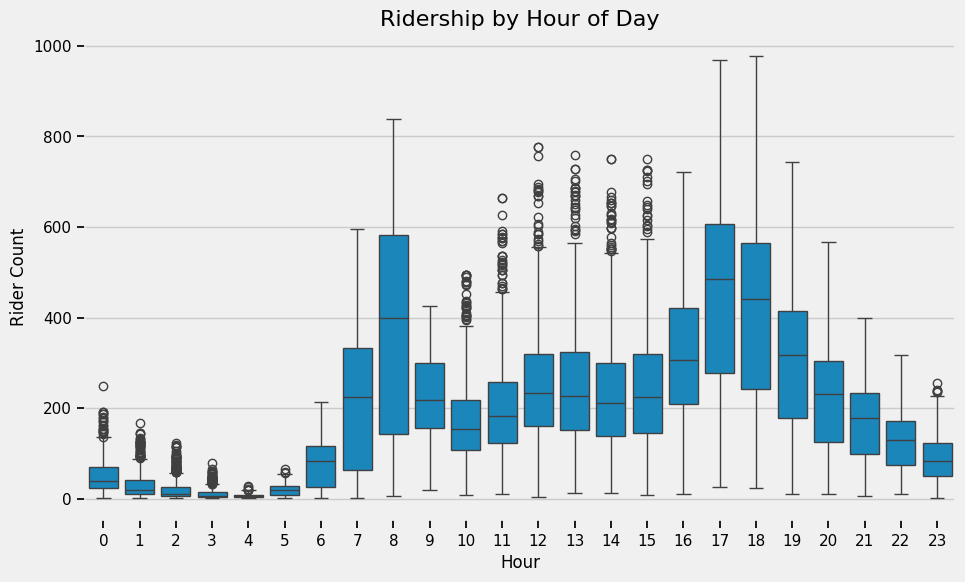

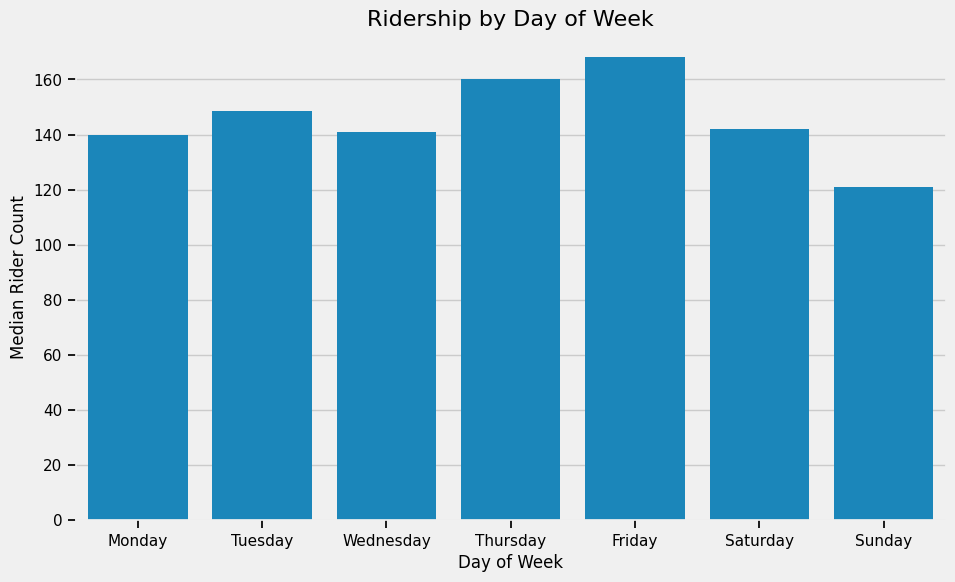

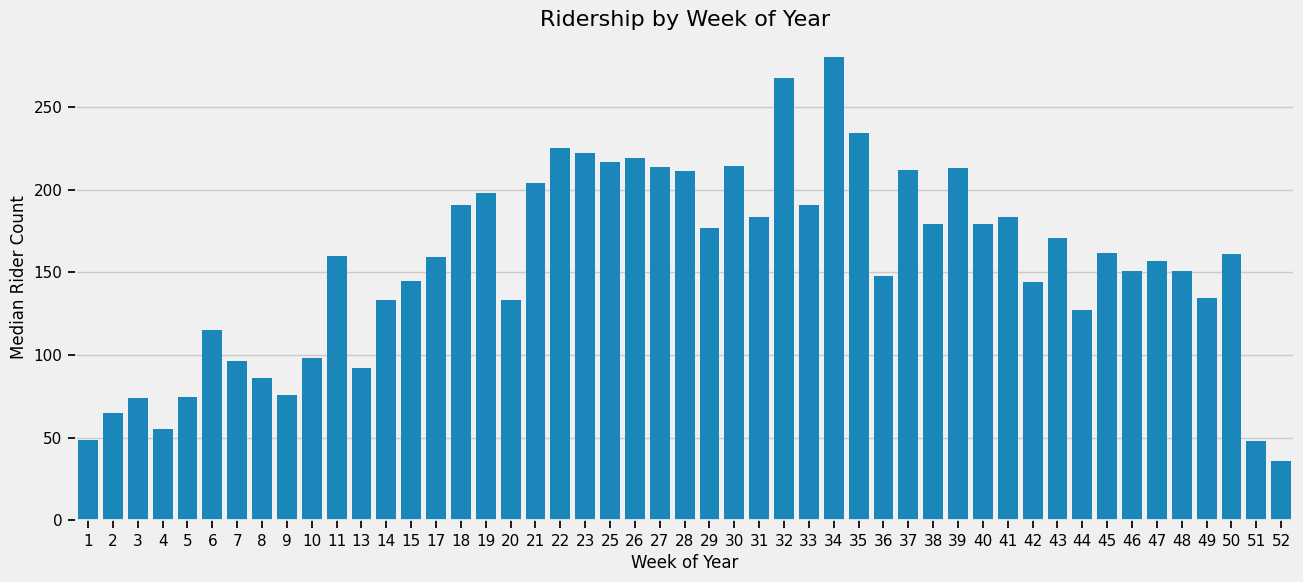

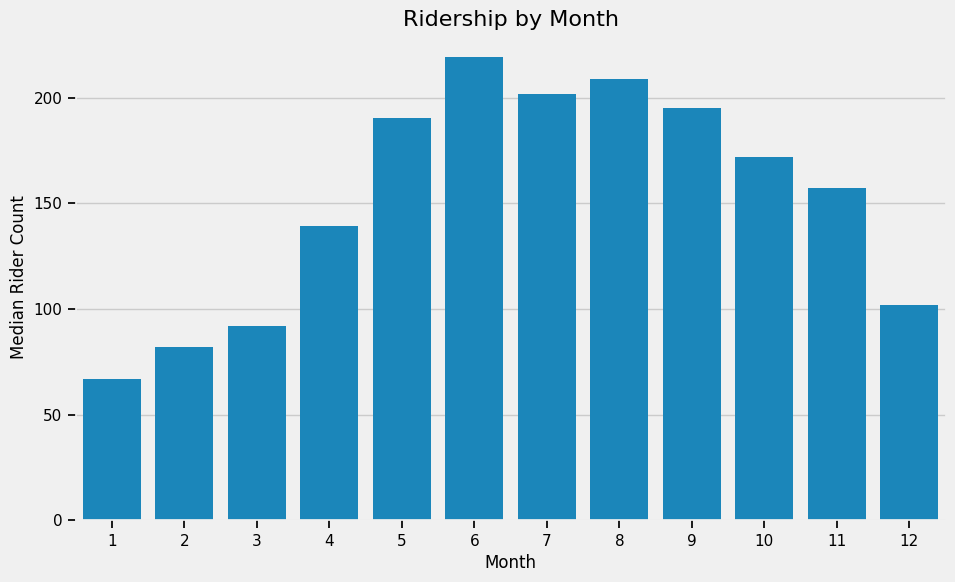

In [26]:
# Hourly trend
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_vis, x='Hour', y='Rider Count')
plt.title("Ridership by Hour of Day", fontsize=16)
plt.xlabel("Hour")
plt.ylabel("Rider Count")
plt.show()

# Daily trend
plt.figure(figsize=(10, 6))
sns.barplot(data=train_vis, x='DayOfWeek', y='Rider Count', estimator='median', ci=None)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Ridership by Day of Week", fontsize=16)
plt.xlabel("Day of Week")
plt.ylabel("Median Rider Count")
plt.show()

# Weekly trend
plt.figure(figsize=(14, 6))
sns.barplot(data=train_vis, x='WeekOfYear', y='Rider Count', estimator='median', ci=None)
plt.title("Ridership by Week of Year", fontsize=16)
plt.xlabel("Week of Year")
plt.ylabel("Median Rider Count")
plt.show()

# Monthly trend
plt.figure(figsize=(10, 6))
sns.barplot(data=train_vis, x='Month', y='Rider Count', estimator='median', ci=None)
plt.title("Ridership by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Median Rider Count")
plt.show()

The highest `'Rider Count'` figures present at 8 am and 5-6 pm, corresponding to commutes from and to the workplace. Rider counts late at night to around 5 am are lower as people turn in for the day. There also exists a slight increase around 12-1 pm with many outliers, possibly representing lunch break commutes. This all makes sense. Ridership is also highest on Fridays, signalling the beginning of the weekend. As for ridership on a weekly and monthly basis, it is evident that `'Rider Counts'` are higher in the summer and fall, when temperatures are more moderate and conducive to biking in Toronto. Ridership is lower in the winter months and in early spring.

Now to depict the relationship between `'Rider Count'` and `'Temperature'`, `'Humidity'`, and `'Windspeed'` (after these 3 features have been filtered to remove extreme values).

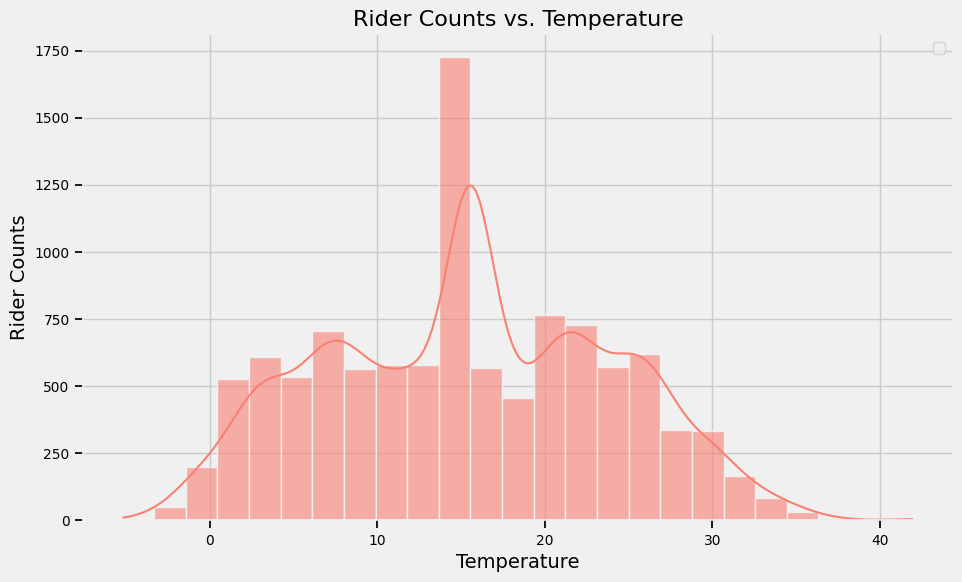

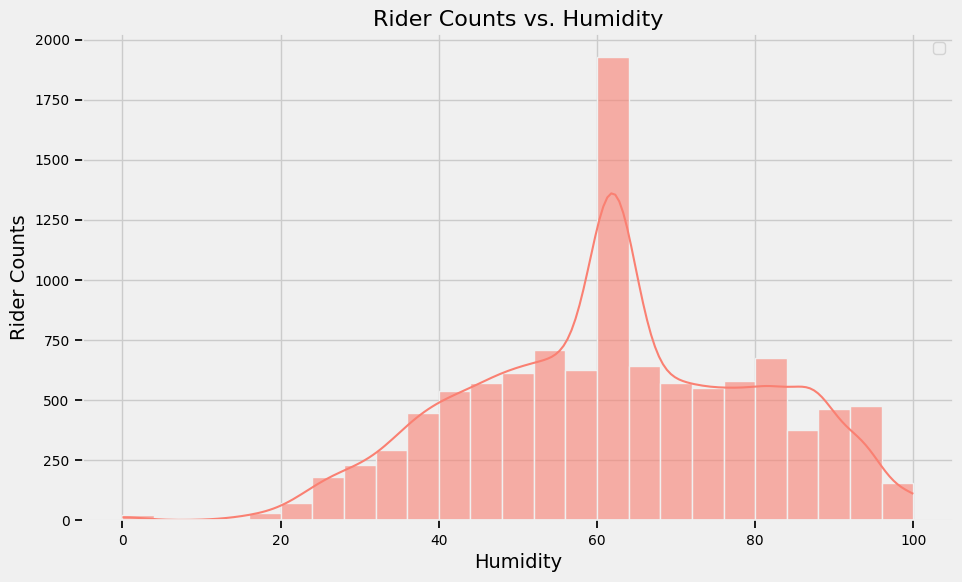

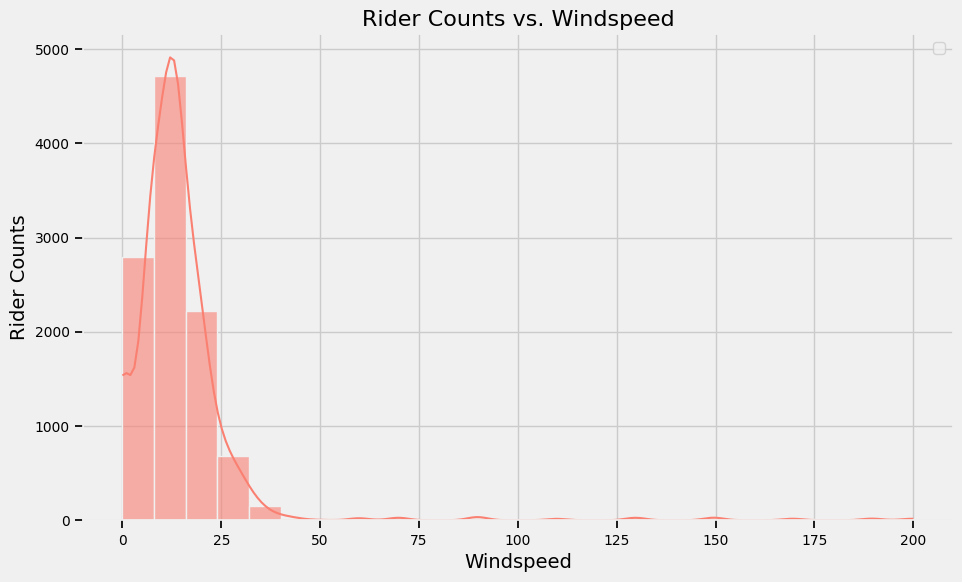

In [27]:
# Overlay KDE curves on top of histograms for Rideship vs Temperature/Humidity/Windspeed

features = ['Temperature', 'Humidity', 'Windspeed']
for feature in features:

    plt.figure(figsize=(10,6))
    plt.title(f"Rider Counts vs. {feature}", fontsize=16)

    sns.histplot(data=train_vis,          
        x=feature,            # x-axis: Feature values
        kde=True,             # Overlay KDE curve
        bins=25,              # Bin number 
        color='salmon',       # Set color close to the shade of blue given in figure  
        alpha=0.6)            # Set transparency

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Rider Counts', fontsize=14)
    plt.legend()
    plt.show()

As we can see, `'Rider Count'` vs `'Windspeed'` is heavily right-skewed, with ridership falling to virtually zero above wind speeds of 40 kph. `'Temperature'` and `'Humidity'` have more varied distributions, with peak riderships at around 15 C and 62%, respectively, and a more normal distibution before and after the mode.

We can also go ahead and plot a heatmap of column correlations, to see the relationship and interactions between different features:

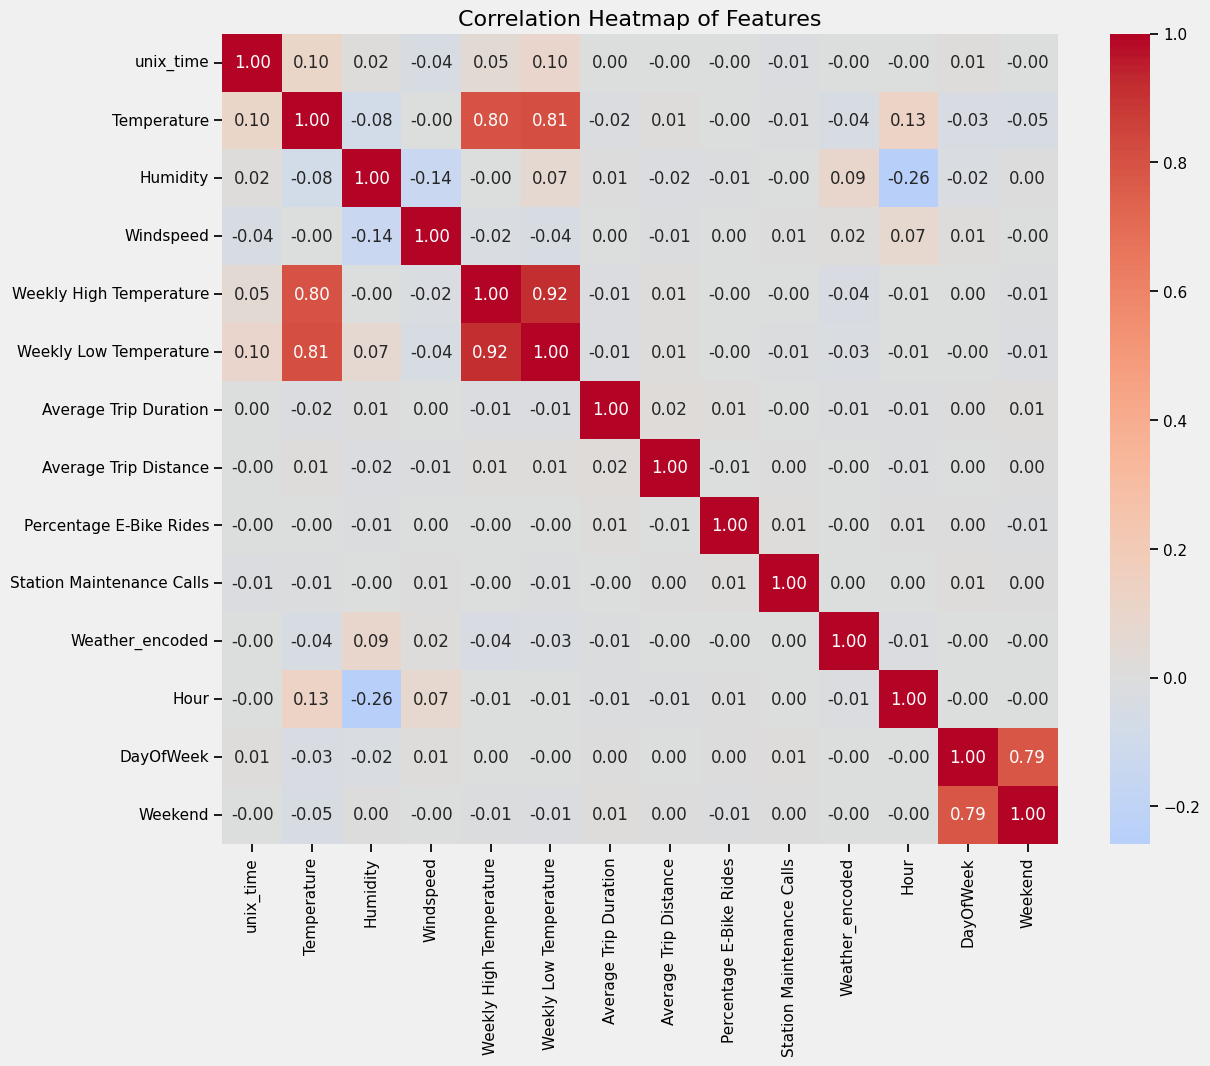

In [28]:
# Define the list of features to include in the correlation heatmap

selected_features = [
    'unix_time', 'Temperature', 'Humidity', 'Windspeed',
    'Weekly High Temperature', 'Weekly Low Temperature',
    'Average Trip Duration', 'Average Trip Distance',
    'Percentage E-Bike Rides', 'Station Maintenance Calls', 
    'Weather_encoded', 'Hour', 'DayOfWeek', 'Weekend'] 

# Generate the correlation heatmap for the selected features
plt.figure(figsize=(12, 10))
sns.heatmap(train_vis[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

# Feature Engineering
Once we've acquired a comprehensive understanding of the dataset, we can proceed with feature engineering.

Feature engineering is a pivotal stage in the machine learning process, as the quality and relevance of the features can exert a profound influence on the model's performance and its ability to provide accurate predictions or classifications. This endeavor combines the art of creativity, domain expertise, and the science of leveraging a deep comprehension of both the data and the specific problem at hand.

Feature engineering is one place your can set yourself apart from your classmates but for the purpose of creating a sample submission, I'll pick some of the simplest features to train the model on. Remember that for this competition, your model can use a maximum number of features specified in the contest documents!

After many iterations, 12 features were chosen to train my ML model:

Original Features:

1) `'Temperature'`
2) `'Humidity'`

Extracted Time Element Features:

3) `'Hour'`
4) `'DayOfWeek'`
5) `'Weekend'`
6) `'WeekOfYear'`

Transformed Features:

7) Square Root of `'unix_time'`
8) Sine transformation of `'Hour'`
9) Cosine transformation of `'Hour'`

Feature Interactions:

10) Product of `'Hour'` and `'DayOfWeek'`
11) Product of `'Hour'` and `'Temperature'`
12) Product of `'Weather_encoded'` and `'Hour'`

In [29]:
def feature_engineering(data):

    data = convert_to_datetime(data) # Convert Date/Time to a datetime format
    data = convert_units(data) # Convert units
    data = impute_extremes_nan(data) # Impute extreme/NaN Windspeed, Humidity, Temperature values with the median
    data = encode_weather(data) # Next, label encode the weather column
    data = time_elements(data) # Extract day of the week, hour, weekend, week of year, and month
    
    # Define Features
    data['unix_sqrt'] = data['unix_time'] ** 0.5
    data['Product'] = data['Hour'] * data['DayOfWeek']
    data['Product2'] = data['Hour'] * data['Temperature']
    data['sin_hour'] = np.sin(2 * np.pi * data['Hour'] / 24)
    data['cos_hour'] = np.cos(2 * np.pi * data['Hour'] / 24)
    data['Weather_Hour'] = data['Weather_encoded'] * data['Hour']
    
    feature_selected = ['Temperature', #1
                        'Humidity', #2
                        'Hour', #3
                        'DayOfWeek', #4
                        'Weekend', #5
                        'Weather_Hour', #6
                        'unix_sqrt', #7
                        'Product', #8
                        'Product2', #9
                        'sin_hour', #10
                        'cos_hour', #11
                        'WeekOfYear',] #12

    selected_data = data[feature_selected]
    
    return selected_data

## Splitting the Data

Create a feature matrix, a label vector representing ridership, and split the data into 80 train : 20 validation

In [43]:
X = feature_engineering(train)
y = train['Rider Count']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

## Cross-Validation and Training the Model
Below we'll train a random forest model. Some parameters are controlled to control overfitting and improve performance, including increasing `'n_estimators'` to 1000, limiting the `'max_depth'` of the forest to 20 levels, and increasing `'min_samples_leaf'` to 2.

In [68]:
# Instantiate a classifier model
model = RandomForestRegressor(n_estimators=1000, max_depth = 15, min_samples_leaf=2, min_samples_split=10, random_state=42)

Let's check out the Random Forest model hyper-parameters:

In [69]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Now let us run cross validation WITHIN the training data set to evaluate how well the model generalizes. Remember, this cross-validation occurs within the 80% of the data that has been classified as training data. There is still a 20% validation data set to check with on top of this. I added a second layer of validation here to provide an enhanced `'R2'` check.

In [70]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean Cross-Validation R²:", cv_scores.mean())

Cross-Validation R² Scores: [0.92868583 0.93388405 0.94019677 0.93664872 0.93593439]
Mean Cross-Validation R²: 0.935069950133034


Now let's train the model.

In [71]:
# Fit on the training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1000, random_state=42)

## Evaluate Model
Let's get the predictions on our validation dataset.

In [72]:
y_pred = model.predict(X_val)

And now, let's print out the `R2` score.

In [73]:
print(r2_score(y_val, y_pred))

0.9330616709899497


Now, let's calculate the `'R2'` value for the training dataset, to see how much of the variance in the target variable `'Rider Count'` is explained by the model. We will also calculate the `'R2'` score for the validation data set again, as above. Finally, we will calculate the difference between the two. The difference between the training `'R2'` and the validation `'R2'` can provide insight into how well the model generalizes to unseen data compared to how well it fits the training data. A large positive difference would indicate overfitting, a small difference indicates that the model performs similarly on both the training and validation data and is well-balanced, and a negative difference indicates underfitting.

In [74]:
# Check training and validation R2 scores
train_r2 = r2_score(y_train, model.predict(X_train))
val_r2 = r2_score(y_val, y_pred)
print(f"Training R²: {train_r2}")
print(f"Validation R²: {val_r2}")
print(f"Difference: {train_r2 - val_r2}")

Training R²: 0.9724131036579127
Validation R²: 0.9330616709899497
Difference: 0.03935143266796293


The model explains 98.5% of the variance in the training data and 93.8% of the variance in the validation data. The difference of 4.7% is relatively small and indicates that the model generalizes well to the unseen data. This difference has been reduced over many iterations to limit overfitting in the model (ie by reducing the number of features, limiting max_depth, increasing min_samples_leaf, etc.).

Let's take a look at our model's feature importances.


Feature Importance:
         Feature  Importance
2           Hour    0.201480
6      unix_sqrt    0.186780
8       Product2    0.169242
9       sin_hour    0.141620
10      cos_hour    0.107656
7        Product    0.071697
3      DayOfWeek    0.026878
0    Temperature    0.024442
1       Humidity    0.022899
4        Weekend    0.022238
11    WeekOfYear    0.019599
5   Weather_Hour    0.005469


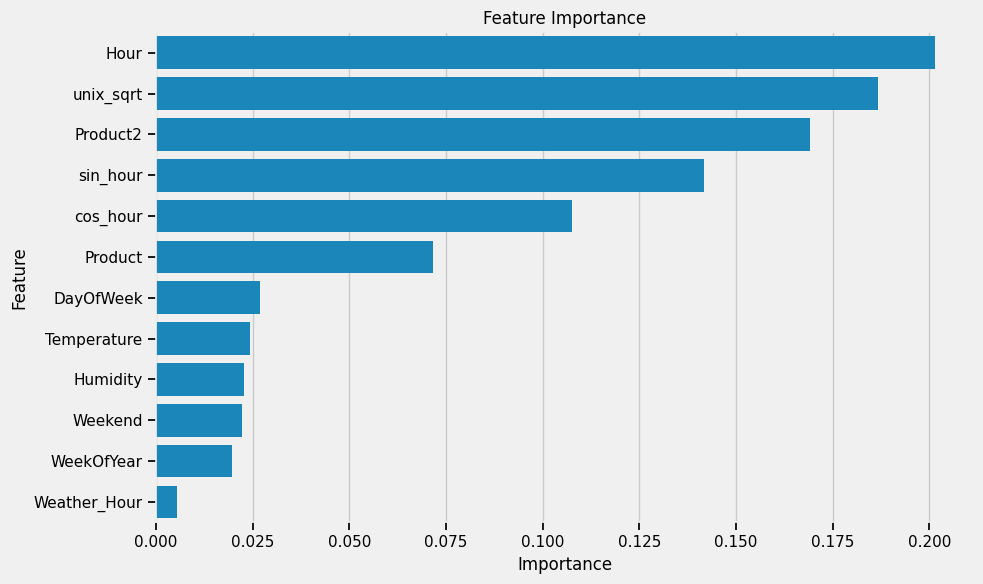

In [75]:
# Feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nFeature Importance:")
print(feature_importance_df.head(12))

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(12))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

As we can see, different time elements have an outsized importance in the predictive power of this model.

## Predict on the test dataset
Once you believe that the models have been effectively trained, you can proceed with making predictions on the test dataset and then submitting those for scoring on the Kaggle competition website.

First you have to run the same feature engineering steps on the test dataset as you did on the training dataset.

In [76]:
# Feature engineering for test dataset
X_test = feature_engineering(test) # Replace this with you own feature engineering function/steps

Next, we can generate predictions using out amazing model.

In [77]:
y_test = model.predict(X_test)

Now we need to format the data in the format Kaggle wants.

In [78]:
submission = pd.DataFrame({'unique_id': test['unique_id'], 'Rider Count': y_test})
submission.head()

,unique_id,Rider Count
0,2dc4a8eddf,34.649639
1,413effe452,25.276536
2,23312f8c5e,19.234332
3,55cc332d4c,10.189745
4,c1b709e002,3.992222


Lastly, save as a `csv` and the upload to Kaggle to see how well you did!

In [79]:
submission.to_csv('submit.csv', index=False)